In [1]:
# Importing Packages
import keras,os # keras is used to include deep learning layers
from keras.models import Sequential # any deep learning model is built begining with sequential model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten # these layers are imported from keras layers
from keras.preprocessing.image import ImageDataGenerator # to load images from image generator
import numpy as np # to handle numpy arrays
import matplotlib.pyplot as plt # matplotlib is used to plot
import cv2 # opencv is used to read and handle images
from keras.preprocessing.image import load_img # used to load images from path
from keras.preprocessing.image import img_to_array # used to convert images to arrays
from keras.applications.vgg16 import preprocess_input # for any given input the values are processed as per vgg16 application
from keras.applications.vgg16 import decode_predictions # from the predictions of vgg16 they are classified
from keras.applications.vgg16 import VGG16 # this is used to access pre-trained VGG16 application from keras
from pathlib import Path #used to handle paths
import tensorflow as tf # tensorflow is used to build neural nets
import pandas as pd # pandas is used to handle dataframes
from progressbar import ProgressBar # progress bar helps us in showing us time taken for a task
import warnings # any warnings displayed 
import tensorflow.keras as keras
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
progress = ProgressBar() 
# This definition is used to read images from the path and store them into a numpy arra
def load_images_from_folder(folder):
    images = []
    for filename in progress(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (256, 256)) 
        if img is not None:
            images.append(img)
            
    img = np.array(images)
    # we are deleting unnecessary memory as its huge
    del images
    return img

C:\Users\HEMANTH\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Data

In [2]:
# calling the definition to store numpy array of images from the path
crop = load_images_from_folder('data\image\cropped')

100% (18448 of 18448) |##################| Elapsed Time: 0:01:49 Time:  0:01:49


In [3]:
# this dataframe is used to help us with labels of each image
df_clean = pd.read_csv("Covid_EDA_cropped.csv")
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   File_no       18448 non-null  int64 
 1   Source        18448 non-null  object
 2   Catogery      18448 non-null  object
 3   Processed     18448 non-null  object
 4   Probe_Type    18448 non-null  object
 5   Frame_number  18448 non-null  object
dtypes: int64(1), object(5)
memory usage: 864.9+ KB


,File_no,Source,Catogery,Processed,Probe_Type,Frame_number
0,100,litfl,other,prc,convex,frame0
1,100,litfl,other,prc,convex,frame1
2,100,litfl,other,prc,convex,frame10
3,100,litfl,other,prc,convex,frame11
4,100,litfl,other,prc,convex,frame12


## Ordinal Encoding Labels

In [4]:
# As labels are categorical data we are converting them to ordinal for ease of modelling and handling loss function
labs = []
for i in df_clean['Catogery']:
    if i == 'covid':
        labs.append(0)
    if i == 'normal':
        labs.append(1)
        
    if i =='other':
        labs.append(2)
    if i =='pneumonia':
        labs.append(3)

## Normalizing data

In [5]:
# data normalization is used to get the RGB filters from scale 0-255 to 0-1, so that it is independent of scale and everything 
# is in unity
crop = crop.astype('float32') / 255
labs = np.array(labs)


## Data partitioning into train and test splits

In [6]:
# train test split package helps us in dividing the data into train and test sets
from sklearn.model_selection import train_test_split

# we are specifically using startify method as we have different proportions of data labels
image_train, image_test, label_train, label_test = train_test_split(crop,labs,random_state=1, stratify=labs)

## Data Distribution

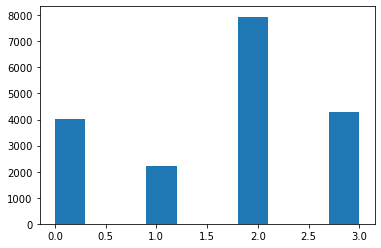

In [7]:
plt.hist(labs)
plt.show()

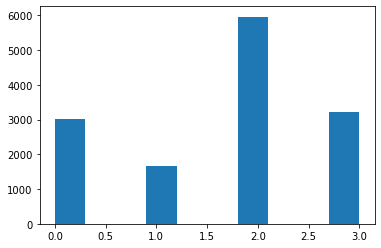

In [8]:
plt.hist(label_train)
plt.show()

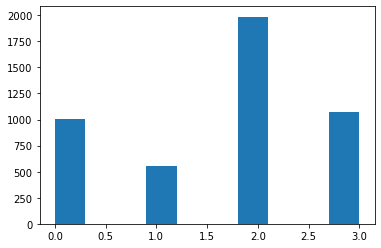

In [9]:
plt.hist(label_test)
plt.show()

In [10]:
# veryfying the final shapes of the data
print(image_train.shape)
print(len(label_train))
# removing unnecessary data to conserve memory
del crop
#image_train=image_train.reshape(840,1,256*256,3)

(13836, 256, 256, 3)
13836


In [11]:
print(image_test.shape)

(4612, 256, 256, 3)


## Reshaping array to 2D image to 1D

In [12]:
# As these are 1D algorithms, we resize the images into 1D vector
image_test=image_test.reshape(4612,1*256*256*3)

In [13]:
# As these are 1D algorithms, we resize the images into 1D vector
image_train=image_train.reshape(13836,1*256*256*3)

In [14]:
print(image_train.shape)

(13836, 196608)


In [15]:
import datetime
e = datetime.datetime.now()
print ("The time is now: = %s:%s:%s" % (e.hour, e.minute, e.second))

The time is now: = 13:44:7


## Data Training

In [16]:
# Naive Bayes algorithm defintion as model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(image_train, label_train)

GaussianNB()

In [17]:
f = datetime.datetime.now()
print ("The time is now: = %s:%s:%s" % (f.hour, f.minute, f.second))


The time is now: = 13:45:5


## Performance on Training Data

In [18]:
# predicting the images
y_pred = clf.predict(image_train)

In [19]:
# Classification report the model performance
from sklearn.metrics import classification_report
print(classification_report(label_train, y_pred, target_names=["Covid","Normal","Other","pneumonia"]))

              precision    recall  f1-score   support

       Covid       0.71      0.73      0.72      3002
      Normal       0.34      0.91      0.49      1651
       Other       0.89      0.39      0.54      5958
   pneumonia       0.62      0.70      0.66      3225

    accuracy                           0.60     13836
   macro avg       0.64      0.68      0.60     13836
weighted avg       0.72      0.60      0.60     13836



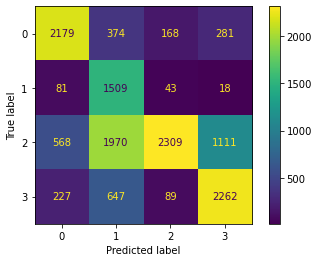

In [20]:
# Confusion matrix is used to understand the bias between class labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(label_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

## Performance on Test Data

In [21]:
# predicting the images
y_pred = clf.predict(image_test)

In [22]:
# Classification report the model performance
from sklearn.metrics import classification_report
print(classification_report(label_test, y_pred, target_names=["Covid","Normal","Other","pneumonia"]))

              precision    recall  f1-score   support

       Covid       0.71      0.72      0.72      1001
      Normal       0.33      0.90      0.48       550
       Other       0.87      0.41      0.56      1986
   pneumonia       0.61      0.65      0.63      1075

    accuracy                           0.59      4612
   macro avg       0.63      0.67      0.60      4612
weighted avg       0.71      0.59      0.60      4612



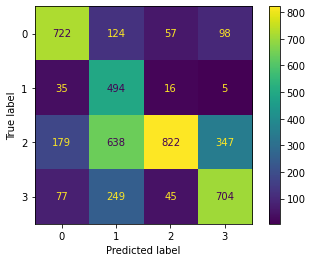

In [23]:
# Confusion matrix is used to understand the bias between class labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(label_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()